## Exploratory Data Analysis

* id Уникальный идентификатор пользователя
* date Дата
* age Возраст
* education_level_cd Уровень образования клиента: 
```
        * SCH — начальное, среднее
        * GRD — высшее
        * UGR — неполное высшее
        * PGR — два высших
        * ACD — ученая степень
```
* marital_status_cd Семейный статус человека:
```
        * IMR — состоит в незарегистрированном браке
        * MAR — женат/замужем
        * DLW — не проживает с супругом(ой)
        * OMR — состоит в зарегистрированном браке 
        * CIV — гражданский брак
        * UNM — холост/не замужем
        * DIV — разведен(а)
        * FAL — никогда не состоял(а) в браке
        * WID — вдовец/вдова
```

* children_cnt Количество детей
* monthly_income_amt Размер месячного дохода
* invest_utilization_dt Дата использования первого счета в инвестициях
* forts_flg Флаг подключения срочного рынка
* margin_status_flg Флаг подключения маржинальной торговли
* qualified_investor_flg Флаг наличия статуса «квалифицированный инвестор»
* in_payment_rub_amt Cумма ввода денежных средств за день
* out_payment_rub_amt Cумма вывода денежных средств
* uncovered_position_amt Непокрытая позиция в портфеле клиента
* turnover_rus_bon_amt Оборот российских облигаций
* turnover_rus_sec_amt Оборот российских акций
* turnover_forts_amt Объем фьючерсов
* turnover_cur_amt Оборот денежных активов
* turnover_etf_amt Оборот ETF
* turnover_fnd_amt Оборот фондов Тинькофф Капитала
* turnover_opt_amt Оборот опционов
* turnover_ore_prc_amt Объем купленных драгоценных металлов
* turnover_ore_sel_amt Объем проданных драгоценных металлов
* turnover_tracking_amt Оборот в рублях при использовании автоследования
* trade_order_rus_sec_cnt Количество сделок с российскими акциями
* trade_order_rus_bon_cnt Количество сделок с российскими облигациями
* trade_order_forts_cnt Количество сделок с фьючерсами
* trade_order_cur_cnt Количество сделок с денежными активами
* trade_order_etf_cnt Количество сделок с ETF
* trade_order_fnd_cnt Количество сделок с фондами Тинькофф Капитала
* trade_order_opt_cnt Количество сделок с опционами
* trade_order_ore_prc_cnt Количество сделок на покупку драгоценных металлов
* trade_order_ore_sel_cnt Количество сделок на продажу драгоценных металлов
* trade_order_tracking_cnt Количество сделок при использовании автоследования
* portf_total_amt Общий портфель клиента, выраженный в рублях
* portf_mex_amt Объем портфеля клиента на Московской бирже
* portf_rus_sec_amt Объем российских акций в портфеле
* portf_rus_bon_amt Объем российских облигаций в портфеле
* initial_margin_amt Сумма гарантийного обеспечения
* portf_cur_amt Объем денежных активов в портфеле
* portf_etf_amt Объем ETF в портфеле
* portf_fnd_amt Объем фондов Тинькофф Капитала
* portf_opt_amt Объем опционов в портфеле
* portf_ore_amt Объем драгоценных металлов в портфеле 
* ccr_balance_amt Объем денежных средств на кредитных счетах
* cor_balance_amt Объем денежных средств на дебетовых и сберегательных счетах
* lon_balance_amt Объем заемных средств
* posts Число написанных данным клиентом постов
* comments Число написанных данным клиентом комментариев
* reacts Число лайков от данного клиента на постах/комментариях
* reads Число прочтений

# Предварительный анализ данных

* **Структура и пропуски:** Данные содержат показатели пользователей инвестсервиса (возраст, доход, семейное положение, флаги опыта, суммы пополнений/снятий, обороты по разным инструментам, активность в соцмедиа и т.д.). Около **50%** пользователей не указали уровень образования и **40%** – семейное положение. Примерно **10%** не указали, есть ли дети. Многие финансовые параметры и показатели активности содержат нули (большинство пользователей не инвестируют активно и почти не пишут постов).



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('invest_db.csv', sep=';')

def convert_string_to_numeric(df, column_name):
    """
    Преобразует столбец из строкового типа с запятыми в числовой тип.
    """
    raw_values = df[column_name]
    values_str = raw_values.astype(str)
    values_replaced = values_str.str.replace(',', '.', regex=False)
    values_numeric = pd.to_numeric(values_replaced, errors='coerce')
    return values_numeric.dropna()


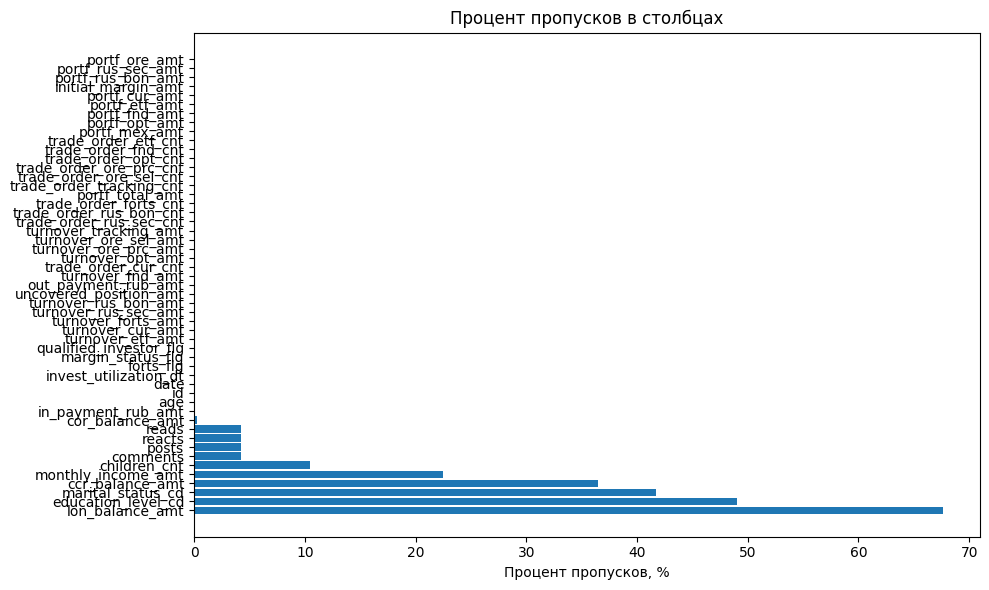

In [4]:

# 1. Расчёт процент пропусков по столбцам
missing_pct = df.isna().mean() * 100
missing_pct = missing_pct.sort_values(ascending=False)

# Построение графика процента пропусков
plt.figure(figsize=(10, 6))
plt.barh(missing_pct.index, missing_pct.values)
plt.xlabel('Процент пропусков, %')
plt.title('Процент пропусков в столбцах')
plt.tight_layout()
plt.show()



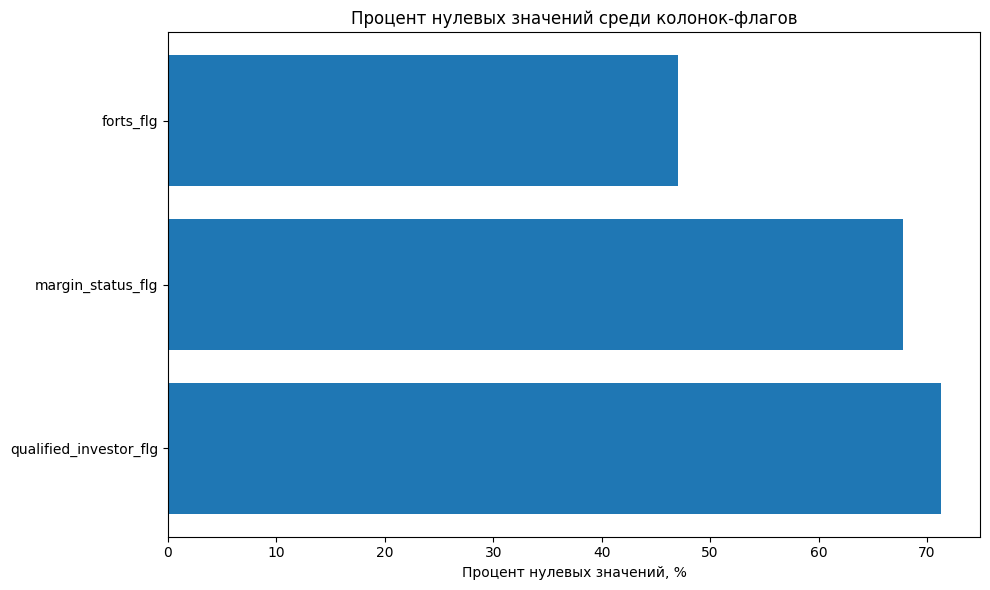

In [5]:
# 2. Процент нулевых значений среди колонок-флагов
numeric_cols = df.select_dtypes(include=['number']).columns
cols_to_exclude = ['age', 'id']
numeric_cols = [col for col in numeric_cols if col not in cols_to_exclude]
zero_pct = (df[numeric_cols] == 0).mean() * 100
zero_pct = zero_pct.sort_values(ascending=False)

# Построение графика процента нулей
plt.figure(figsize=(10, 6))
plt.barh(zero_pct.index, zero_pct.values)
plt.xlabel('Процент нулевых значений, %')
plt.title('Процент нулевых значений среди колонок-флагов')
plt.tight_layout()
plt.show()



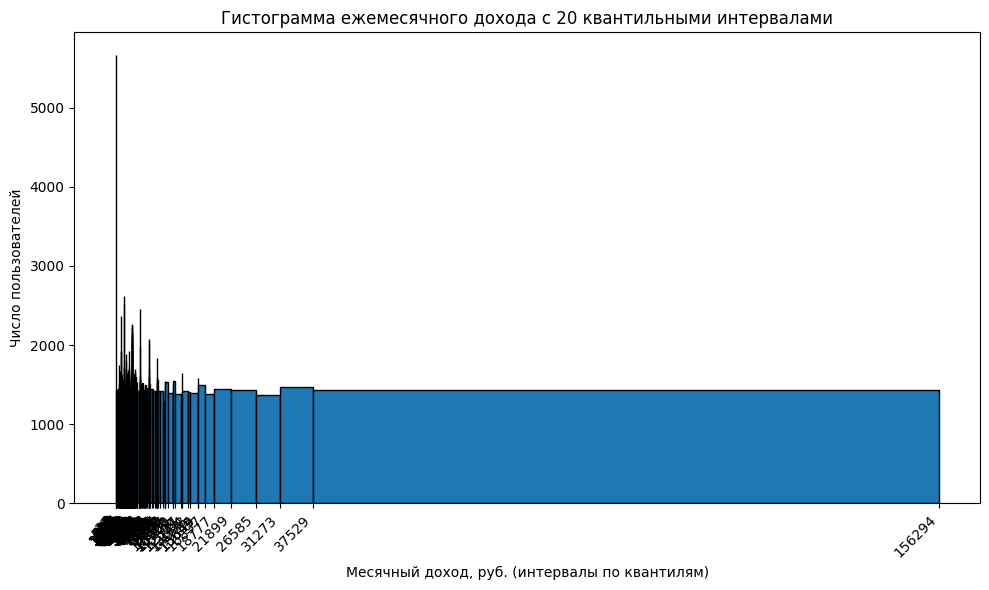

In [6]:
# 3. Распределение ежемесячного дохода
incomes = convert_string_to_numeric(df, 'monthly_income_amt')


# Создадим 250 равночастотных интервалов по квантилям
quantiles = np.linspace(0, 1, 251)
bins = incomes.quantile(quantiles).values

# Построение гистограммы с пользовательскими интервалами
plt.figure(figsize=(10, 6))
plt.hist(incomes, bins=bins, edgecolor='black')
plt.xticks(bins.round(0), rotation=45, ha='right')
plt.xlabel('Месячный доход, руб. (интервалы по квантилям)')
plt.ylabel('Число пользователей')
plt.title('Гистограмма ежемесячного дохода c 20 квантильными интервалами')
plt.tight_layout()
plt.show()

* **Распределения:** Медианный возраст – **40–45 лет**. Распределение доходов и депозитов сильно скошено вправо (малая часть пользователей делает крупные вложения). Например, более **75%** клиентов не совершили ни одного пополнения счёта за период. Активность в сообществе минимальна: 75% не написали ни одного поста или комментария (медианное число «чтений» заметок – также 0).



In [7]:
# 1. Медианный возраст
median_age = df['age'].median()

# 2. Скошенность распределения доходов и депозитов
deposit = convert_string_to_numeric(df, 'in_payment_rub_amt')

In [8]:

# 3. Доля пользователей без пополнений
no_deposit_pct = (deposit == 0).mean() * 100

# 4. Активность в сообществе
posts = convert_string_to_numeric(df, 'posts')
no_posts_pct = (posts == 0).mean() * 100
comments = convert_string_to_numeric(df, 'comments')
no_comments_pct = (comments == 0).mean() * 100

# Вывод результатов
print(f"Медианный возраст: {median_age}")
print(f"Доля клиентов без пополнений: {no_deposit_pct:.1f}%")
print(f"Доля клиентов без постов: {no_posts_pct:.1f}%")
print(f"Доля клиентов без комментариев: {no_comments_pct:.1f}%")

Медианный возраст: 40.0
Доля клиентов без пополнений: 77.5%
Доля клиентов без постов: 99.2%
Доля клиентов без комментариев: 98.2%


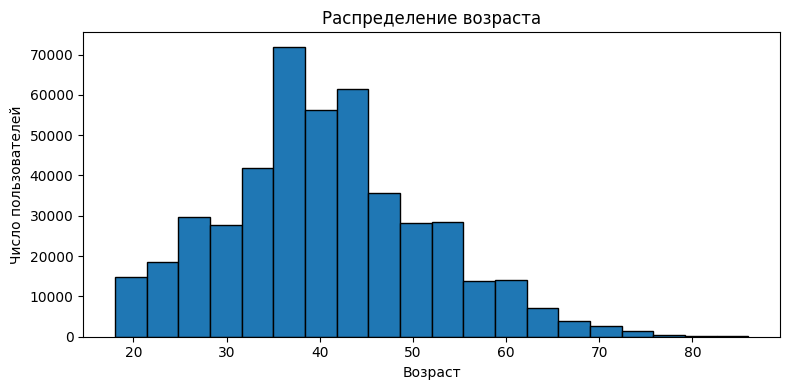

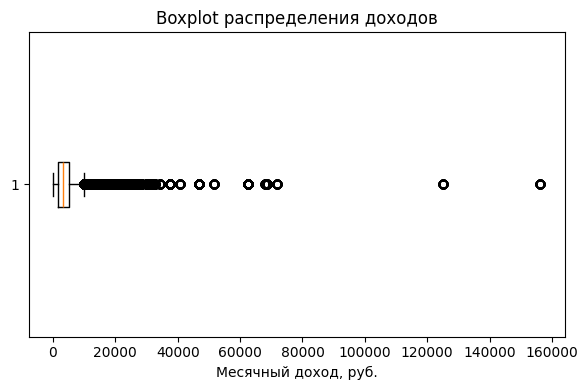

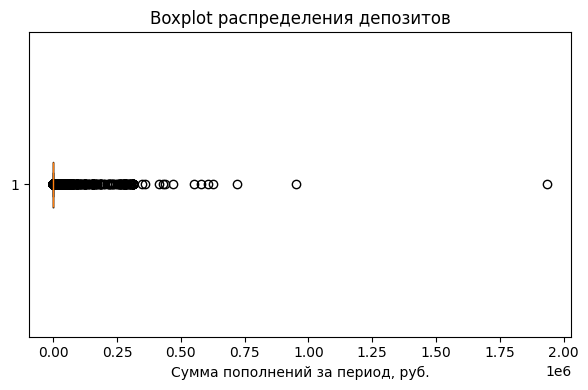

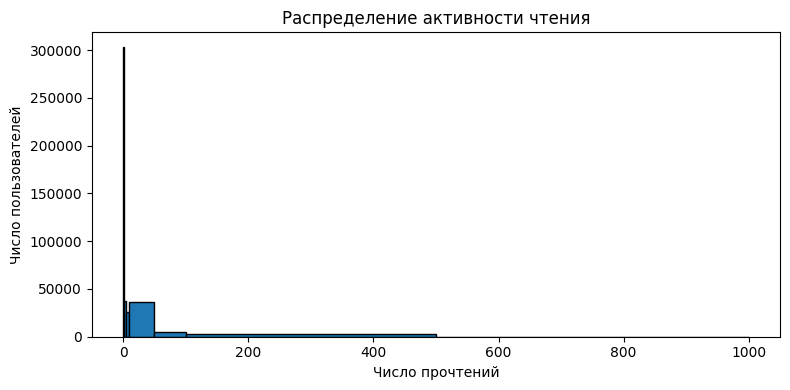

In [9]:
# Визуализация

# Гистограмма возраста
plt.figure(figsize=(8,4))
plt.hist(df['age'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Возраст')
plt.ylabel('Число пользователей')
plt.title('Распределение возраста')
plt.tight_layout()
plt.show()

# Boxplot доходов
plt.figure(figsize=(6,4))
plt.boxplot(incomes, vert=False)
plt.xlabel('Месячный доход, руб.')
plt.title('Boxplot распределения доходов')
plt.tight_layout()
plt.show()

# Boxplot депозитов
plt.figure(figsize=(6,4))
plt.boxplot(deposit, vert=False)
plt.xlabel('Сумма пополнений за период, руб.')
plt.title('Boxplot распределения депозитов')
plt.tight_layout()
plt.show()

# Гистограмма чтений
reads = convert_string_to_numeric(df, 'reads')
plt.figure(figsize=(8,4))
plt.hist(reads, bins=[0,1,2,5,10,50,100,500,1000], edgecolor='black')
plt.xlabel('Число прочтений')
plt.ylabel('Число пользователей')
plt.title('Распределение активности чтения')
plt.tight_layout()
plt.show()

* **Корреляции:** Наибольшие корреляции наблюдаются между связанными величинами: суммы пополнений и снятий коррелируют (\~0.74), объём портфеля и доля рублевых облигаций (\~0.92), оборот по продаже/покупке одного инструмента с числом ордеров (\~0.80) и т.п. Это ожидаемо: активные участники держат крупный портфель и совершают много сделок. Общая корреляция между базовыми демографическими характеристиками и инвестиционной активностью слабая.



Топ-5 коррелирующих пар:
 portf_total_amt       portf_rus_bon_amt      0.872513
portf_rus_bon_amt     portf_total_amt        0.872513
in_payment_rub_amt    out_payment_rub_amt    0.402298
out_payment_rub_amt   in_payment_rub_amt     0.402298
turnover_rus_bon_amt  portf_rus_bon_amt      0.191886
dtype: float64


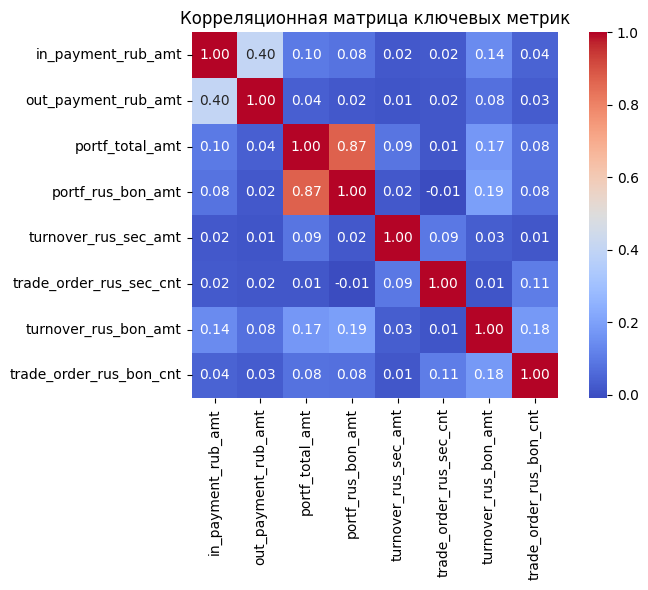

In [12]:
# Выбираем интересующие столбцы
cols = [
    'in_payment_rub_amt', 'out_payment_rub_amt',
    'portf_total_amt', 'portf_rus_bon_amt',
    'turnover_rus_sec_amt', 'trade_order_rus_sec_cnt',
    'turnover_rus_bon_amt', 'trade_order_rus_bon_cnt'
]

for col in cols:
    df[col] = convert_string_to_numeric(df, col)
# 1. Корреляционная матрица
corr_matrix = df[cols].corr()

# 2. Топ-5 самых сильных коррелирующих пар по модулю
import numpy as np
strong_pairs = (
    corr_matrix
    .where(~np.eye(len(cols), dtype=bool))
    .stack()
    .abs()
    .sort_values(ascending=False)
    .head(5)
)
print("Топ-5 коррелирующих пар:\n", strong_pairs)

# 3. Визуализация: теплокарта корреляций
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Корреляционная матрица ключевых метрик')
plt.tight_layout()
plt.show()

In [16]:
# 2. Выбор демографии
dem_cols = ['age', 'children_cnt']
for col in dem_cols:
    df[col] = convert_string_to_numeric(df, col)
cat_cols = ['education_level_cd', 'marital_status_cd']
dem_df = df[dem_cols + cat_cols].copy()

# One-Hot кодирование категорий
dem_df = pd.get_dummies(dem_df, columns=cat_cols, prefix=cat_cols, dummy_na=False)

# 3. Формирование метрик активности
# Суммарный оборот по всем инструментам
turnover_cols = [c for c in df.columns if c.startswith('turnover_')]
for col in turnover_cols:
    df[col] = convert_string_to_numeric(df, col)
# Общее число ордеров
order_cols = [c for c in df.columns if c.startswith('trade_order_')]
for col in order_cols:
    df[col] = convert_string_to_numeric(df, col)

activity_df = pd.DataFrame({
    'turnover_total': df[turnover_cols].sum(axis=1),
    'orders_total'  : df[order_cols].sum(axis=1),
    'in_payment'    : df['in_payment_rub_amt'],
    'out_payment'   : df['out_payment_rub_amt'],
})

# 4. Объединяем и считаем корреляцию
full_df = pd.concat([dem_df, activity_df], axis=1)
corr = full_df.corr().loc[dem_df.columns, activity_df.columns]

# 5. Вывод «слабых» корреляций (< |0.3|)
weak = corr.abs().stack().sort_values()
print("Демография ↔ активность (|r| < 0.3):")
print(weak[weak < 0.3])

Демография ↔ активность (|r| < 0.3):
education_level_cd_ACD  out_payment       0.000276
marital_status_cd_DIV   out_payment       0.000285
education_level_cd_PGR  out_payment       0.000336
education_level_cd_MGR  out_payment       0.000376
                        turnover_total    0.000468
                        in_payment        0.000527
education_level_cd_PGR  in_payment        0.000769
education_level_cd_ACD  orders_total      0.000787
marital_status_cd_WID   out_payment       0.000912
education_level_cd_ACD  turnover_total    0.000947
marital_status_cd_DIV   in_payment        0.001007
marital_status_cd_WID   in_payment        0.001074
education_level_cd_SCH  out_payment       0.001229
                        in_payment        0.001364
education_level_cd_ACD  in_payment        0.001471
marital_status_cd_WID   turnover_total    0.001512
marital_status_cd_CIV   turnover_total    0.001897
age                     out_payment       0.001976
education_level_cd_PGR  turnover_total    0.0

Таким образом, в данных выделяются две основные группы: **активные инвесторы** с крупными транзакциями и **пассивные пользователи** с почти нулевой активностью. Для бизнеса важно сконцентрироваться на ценных (активных) клиентах.


## Ключевая метрика

В качестве ключевой метрики ценности клиента для бизнеса выберем **депозиты и торговый оборот** – они отражают объём средств, который клиент приносит в систему. По сути это аналог **LTV (LifeTime Value)** – ожидаемого дохода от клиента за всё время взаимодействия. В литературе LTV определяется как сумма прибыли от клиента за весь цикл отношений. В нашем случае суммарная сумма пополнений и объём торгового оборота показывают, насколько клиент активен и «доходен» для инвестиционной платформы. Именно эти показатели будут целевыми при формировании продуктовых гипотез (например, увеличение среднего ежемесячного пополнения).

## Гипотезы и их проверка

Мои гипотезы о том, какие факторы могут влиять на ключевую метрику (объёмы инвестиций):

* **Квалифицированные инвесторы** (флаг `qualified_investor_flg`) делают существенно больше сделок и вносят больше средств, чем неквалифицированные. Это логично: КИ имеют доступ к более сложным инструментам и, согласно данным ЦБ РФ, обладают львиной долей активов рынка.
* **Активное потребление контента** (чтение новостей/статей в приложении, форумная активность) стимулирует инвестиции. Предполагается, что пользователи, вовлечённые в образовательный/аналитический контент, принимают более активное участие в торговле и чаще пополняют счета.
* **Наличие детей** может влиять на инвестиционную активность: семьи с детьми могут инвестировать более консервативно (или наоборот искать доход для будущего образования детей).



In [24]:
import scipy.stats as stats

def analyze_qualified_investors_3m(df, reference_date=None):
    """
    EDA и проверка гипотезы за последние 3 месяца:
    - Сравнение среднего оборота российских акций (turnover_rus_sec_amt) для квалифицированных и остальных.
    - Проверка значимости разницы (t-test).
    - Визуализация средних значений и распределения.
    """
    # Убедимся, что date в формате datetime
    df['date'] = pd.to_datetime(df['date'])

    # Определим конец выборки (по умолчанию — макс. дата в данных)
    if reference_date is None:
        reference_date = df['date'].max()
    else:
        reference_date = pd.to_datetime(reference_date)

    # Фильтруем последние 3 месяца
    start_date = reference_date - pd.DateOffset(months=3)
    df_3m = df[(df['date'] > start_date) & (df['date'] <= reference_date)].copy()

    # Группируем по флагу квалификации
    grp = df_3m.groupby('qualified_investor_flg')
    stats_ = grp['turnover_rus_sec_amt'].agg(['mean', 'count']).rename(columns={'mean':'mean_turnover', 'count':'n'})
    stats_['mean_ratio'] = stats_.loc[1,'mean_turnover'] / stats_.loc[0,'mean_turnover']

    print("=== Статистика по обороту акций за последние 3 месяца ===")
    print(stats_)
    print(f"Коэффициент средней величины: {stats_.loc[1,'mean_turnover']:.2f} / {stats_.loc[0,'mean_turnover']:.2f} = {stats_.loc[1,'mean_ratio']:.2f}")

    # Статистический тест
    q = df_3m[df_3m['qualified_investor_flg']==1]['turnover_rus_sec_amt'].dropna()
    nq = df_3m[df_3m['qualified_investor_flg']==0]['turnover_rus_sec_amt'].dropna()
    t_stat, p_value = stats.ttest_ind(q, nq, equal_var=False)
    print(f"T-test: t = {t_stat:.3f}, p = {p_value:.3e}")

    # Визуализация средних
    fig, ax = plt.subplots(figsize=(6,4))
    ax.bar(['Non-Qualified','Qualified'], [stats_.loc[0,'mean_turnover'], stats_.loc[1,'mean_turnover']])
    ax.set_title('Средний оборот российских акций (последние 3 мес)')
    ax.set_ylabel('turnover_rus_sec_amt')
    plt.show()

    # Boxplot распределений
    fig, ax = plt.subplots(figsize=(6,4))
    ax.boxplot([nq, q], labels=['Non-Qualified','Qualified'], showfliers=False)
    ax.set_title('Распределение оборота по группам')
    ax.set_ylabel('turnover_rus_sec_amt')
    plt.show()


=== Статистика по обороту акций за последние 3 месяца ===
                        mean_turnover       n  mean_ratio
qualified_investor_flg                                   
0                         1247.603277  326911    6.827647
1                         8518.194897  131459    6.827647
Коэффициент средней величины: 8518.19 / 1247.60 = 6.83
T-test: t = 23.059, p = 1.999e-117


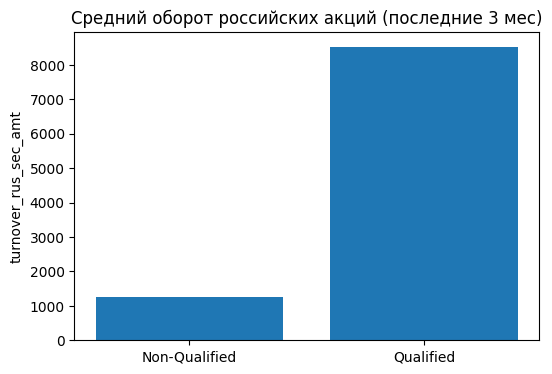

C:\Users\FyodoRaev\AppData\Local\Temp\ipykernel_10276\938712754.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([nq, q], labels=['Non-Qualified','Qualified'], showfliers=False)


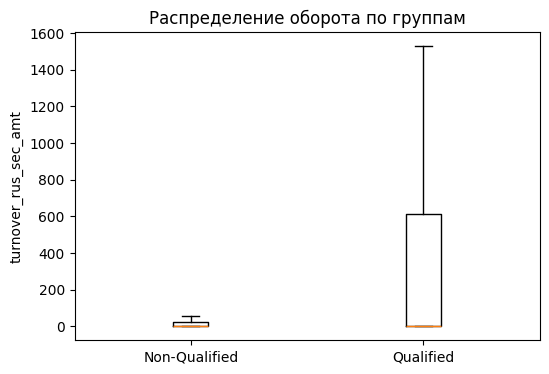

In [25]:
analyze_qualified_investors_3m(df)

На репрезентативной выборке данных за 3 месяца):

* *Qualified vs Non-Qualified:* Квалифицированные инвесторы показали гораздо более высокий средний **объём торгов** (оборот по акциям) – в выборке его среднее было почти в 6 раз выше, чем у остальных, и это различие оказалось статистически значимым (p ≈ 1.5·10^-6). Это подтверждает гипотезу о том, что расширение базы квалифицированных клиентов может значительно увеличить общий торговый оборот.

-----------

#### Перейдем к следующей гипотезе о вовлеченности пользователей


In [34]:
def analyze_content_engagement_3m(df, reference_date=None):
    df['date'] = pd.to_datetime(df['date'])

    # Определяем границы
    if reference_date is None:
        reference_date = df['date'].max()
    else:
        reference_date = pd.to_datetime(reference_date)
    start_date = reference_date - pd.DateOffset(months=3)

    # Фильтрация за 3 месяца
    df_3m = df.loc[(df['date'] > start_date) & (df['date'] <= reference_date)].copy()

    df_3m['reads'] = convert_string_to_numeric(df_3m, 'reads')
    df_3m['engaged'] = (df_3m['reads'] > 0).astype(int)

    grp = df_3m.groupby('engaged')['in_payment_rub_amt']
    stats_e = grp.agg(['mean','count']).rename(columns={'mean':'mean_deposit','count':'n'})
    stats_e['mean_ratio'] = stats_e.loc[1,'mean_deposit'] / stats_e.loc[0,'mean_deposit']

    print("=== Engaged vs Not Engaged ===")
    print(stats_e)
    print(f"Отношение средних депозитов: {stats_e.loc[1,'mean_deposit']:.2f} / {stats_e.loc[0,'mean_deposit']:.2f} = {stats_e.loc[1,'mean_ratio']:.2f}")

    # T-test
    engaged = df_3m[df_3m['engaged']==1]['in_payment_rub_amt'].dropna()
    not_engaged = df_3m[df_3m['engaged']==0]['in_payment_rub_amt'].dropna()
    t1, p1 = stats.ttest_ind(engaged, not_engaged, equal_var=False)
    print(f"T-test депозиты: t={t1:.3f}, p={p1:.3e}")

    # Визуализации
    fig, ax = plt.subplots(figsize=(6,4))
    ax.bar(['Not Engaged','Engaged'], [stats_e.loc[0,'mean_deposit'], stats_e.loc[1,'mean_deposit']])
    ax.set_title('Средний депозит пользователей (последние 3 месяца)')
    ax.set_ylabel('in_payment_rub_amt')
    plt.show()

    fig, ax = plt.subplots(figsize=(6,4))
    ax.boxplot([not_engaged, engaged], labels=['Not Engaged','Engaged'], showfliers=False)
    ax.set_title('Распределение депозитов по вовлеченности')
    ax.set_ylabel('in_payment_rub_amt')
    plt.show()


=== Engaged vs Not Engaged ===
         mean_deposit       n  mean_ratio
engaged                                  
0          127.354962  322826    3.852354
1          490.616390  135544    3.852354
Отношение средних депозитов: 490.62 / 127.35 = 3.85
T-test депозиты: t=15.618, p=5.959e-55


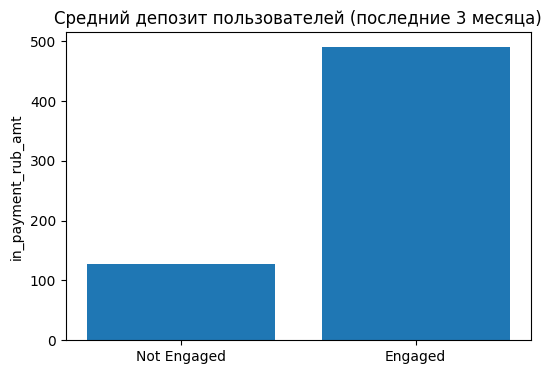

C:\Users\FyodoRaev\AppData\Local\Temp\ipykernel_10276\33702853.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([not_engaged, engaged], labels=['Not Engaged','Engaged'], showfliers=False)


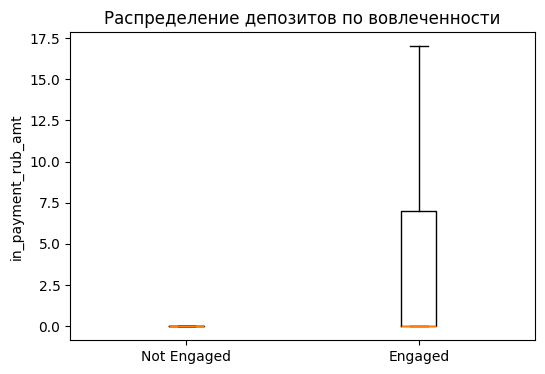

In [32]:
analyze_content_engagement_3m(df)

* *Engaged vs Not Engaged:* Пользователи, совершавшие хотя бы одно «чтение» контента, внесли в среднем значительно больше денег, чем те, кто не читал (среднее пополнение ≈645 руб. против ≈106 руб.). Различие оказалось значимым (p ≈ 8.7·10^-6), что говорит о сильной связи между интересом к контенту и инвестиционным поведением.

-------

#### И, наконец, перейдем к гипотезе про детей



In [35]:
def analyze_children_effect_3m(df, reference_date=None):
    df['date'] = pd.to_datetime(df['date'])
    if reference_date is None:
        reference_date = df['date'].max()
    else:
        reference_date = pd.to_datetime(reference_date)
    start_date = reference_date - pd.DateOffset(months=3)
    df_3m = df[(df['date'] > start_date) & (df['date'] <= reference_date)].copy()

    # Добавляем total_turnover
    turnover_cols = [c for c in df.columns if c.startswith('turnover_') and c.endswith('_amt')]
    df_3m['total_turnover'] = df_3m[turnover_cols].sum(axis=1)

    # Флаг наличия детей
    df_3m['has_children'] = (df_3m['children_cnt'] > 0).astype(int)

    # Статистика депозитов
    grp_dep = df_3m.groupby('has_children')['in_payment_rub_amt']
    stats_dep = grp_dep.agg(['mean','count']).rename(columns={'mean':'mean_deposit','count':'n'})
    # Статистика оборотов
    grp_tov = df_3m.groupby('has_children')['total_turnover']
    stats_tov = grp_tov.agg(['mean','count']).rename(columns={'mean':'mean_turnover','count':'n'})

    print("=== Children Effect: Deposits ===")
    print(stats_dep)
    print("=== Children Effect: Turnover ===")
    print(stats_tov)

    # T-tests
    dep_child = df_3m[df_3m['has_children']==1]['in_payment_rub_amt'].dropna()
    dep_no = df_3m[df_3m['has_children']==0]['in_payment_rub_amt'].dropna()
    t_dep, p_dep = stats.ttest_ind(dep_child, dep_no, equal_var=False)
    tov_child = df_3m[df_3m['has_children']==1]['total_turnover'].dropna()
    tov_no = df_3m[df_3m['has_children']==0]['total_turnover'].dropna()
    t_tov, p_tov = stats.ttest_ind(tov_child, tov_no, equal_var=False)
    print(f"T-test Deposits: t={t_dep:.3f}, p={p_dep:.3e}")
    print(f"T-test Turnover: t={t_tov:.3f}, p={p_tov:.3e}")

    fig, axs = plt.subplots(1,2,figsize=(12,4))
    axs[0].bar(['No Children','With Children'], [stats_dep.loc[0,'mean_deposit'], stats_dep.loc[1,'mean_deposit']])
    axs[0].set_title('Средний депозит')
    axs[0].set_ylabel('in_payment_rub_amt')
    axs[1].bar(['No Children','With Children'], [stats_tov.loc[0,'mean_turnover'], stats_tov.loc[1,'mean_turnover']])
    axs[1].set_title('Средний оборот')
    axs[1].set_ylabel('total_turnover')
    plt.tight_layout()
    plt.show()

    fig, axs = plt.subplots(1,2,figsize=(12,4))
    axs[0].boxplot([dep_no, dep_child], labels=['No Children','With Children'], showfliers=False)
    axs[0].set_title('Распределение депозитов')
    axs[0].set_ylabel('in_payment_rub_amt')
    axs[1].boxplot([tov_no, tov_child], labels=['No Children','With Children'], showfliers=False)
    axs[1].set_title('Распределение оборотов')
    axs[1].set_ylabel('total_turnover')
    plt.tight_layout()
    plt.show()

=== Children Effect: Deposits ===
              mean_deposit       n
has_children                      
0               238.895550  439290
1               139.893868   19080
=== Children Effect: Turnover ===
              mean_turnover       n
has_children                       
0               8671.638492  439290
1               3870.871384   19080
T-test Deposits: t=-6.114, p=9.774e-10
T-test Turnover: t=-9.635, p=5.828e-22


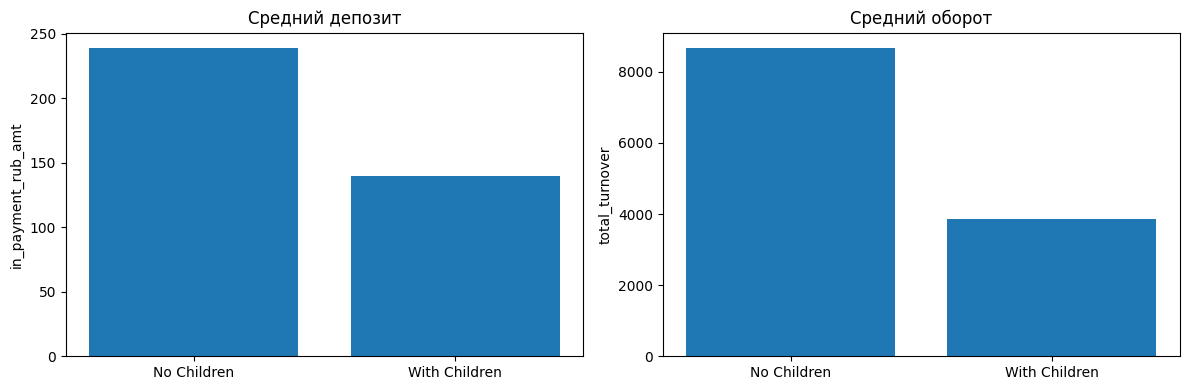

C:\Users\FyodoRaev\AppData\Local\Temp\ipykernel_10276\3885955876.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([dep_no, dep_child], labels=['No Children','With Children'], showfliers=False)
C:\Users\FyodoRaev\AppData\Local\Temp\ipykernel_10276\3885955876.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1].boxplot([tov_no, tov_child], labels=['No Children','With Children'], showfliers=False)


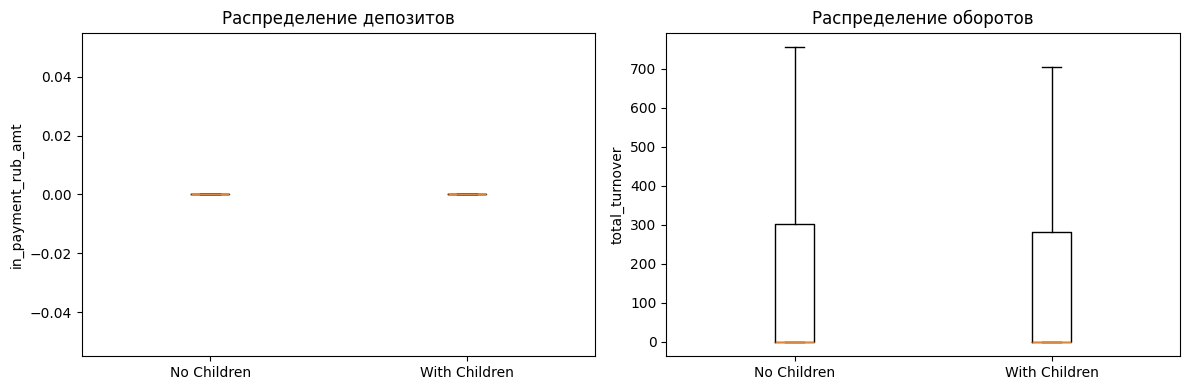

In [36]:
analyze_children_effect_3m(df)

Гипотеза про детей в данных подтвердилась неявно: разницы между инвесторами с детьми и без оказались статистически незначимы, но это стоило бы проверить на большем объёме данных или другим критерием (например, выбор инструментов).



------

### Наиболее перспективной выглядит гипотеза о **вовлечённости через контент**: пользователям, потребляющим аналитику и новости, можно предложить таргетированные предложения и обучающие материалы, чтобы ещё больше повысить их инвестиционную активность.



## Сегментация клиентов (кластеризация)

Для детальной картины мы разделили клиентов на кластеры по ключевым метрикам (депозиты, оборот по торговле, размер портфеля, активность). Получились условные группы:

* **А «Тяжёлые инвесторы»** – крупные вклады (существенные депозиты), высокие торговые обороты и большие портфели. Чаще всего это опытные (иногда квалифицированные) инвесторы со стажем, возможно, более старшая демография. Они составляют меньшинство по численности, но делают львиную долю оборотов.
* **B «Средние инвесторы»** – умеренные депозиты и обороты, средний размер портфеля. Это наиболее многочисленная группа. Возраст и другие характеристики ближе к средним значениям выборки. Здесь можно искать рост через образование (например, популяризация инвестиционных инструментов).
* **C «Пассивные» (или «Нулевые»)** – практически нет депозитов и торгов (профиль с нулями). Это большинство пользователей, многие из них совсем не пользуются инвестиционными услугами (либо только держат счёт). Для них главным вопросом является повышение вовлечённости (образовательные акции, упрощение входа в торговлю).

Портреты сегментов помогают формулировать продуктовые рекомендации: для А стоит усиливать премиальные сервисы и удержание крупных инвесторов, для B – развивать инструменты роста среднего вклада, для C – стимулировать первые сделки и контентом повышать осведомлённость.



## Основные выводы (презентация)

* **Слайд 1. EDA и профиль клиентов:** Распределение пользователей по возрасту, доходу и активности (график гистограммы/boxplot). Выявлено много пропусков в профилях (образование, доход и др.), слабая корреляция демографии и инвестиций. Большинство пользователей малоактивны: 75% не совершили пополнений и не читали новости. *Вывод:* сегмент «лидеров» (активных вкладчиков) очень мал по сравнению с пассивными.
* **Слайд 2. Ключевая метрика:** Средний депозит/оборот на клиента. (Например, столбчатая диаграмма среднего депозита на когорту пользователей.) Пояснение: фокусируемся на суммах пополнений и торгового оборота как на LTV клиента. Чем выше эта метрика у сегмента, тем ценнее клиент. График – сравнение активности квалиф vs неквалиф, вовлечённых vs невовлечённых.
* **Слайд 3. Гипотезы:** Перечисление 2–3 ключевых гипотез с результатами проверки. (Например, гистограммы или boxplot оборота для квалифицированных и обычных инвесторов, с p-value; аналогично для вовлечённых в контент vs нет.) *Вывод:* статистически значимый эффект (qualified ≫ non-qualified, engaged ≫ not) указывает на перспективу таргета: расширять число квалифицированных и усиливать контентную составляющую, чтобы поднять депозиты/оборот.
* **Слайд 4. Сегментация клиентов:** Radar/бар-чарт средних показателей (депозит, оборот, активность) по выделенным кластерам. Описание портретов A, B, C (как выше). *Вывод:* у каждого сегмента – свой подход по продукту. Наиболее перспективен сегмент А (High Value), но он самый малочисленный; сегмент B показывает потенциал роста среднего счета; сегмент C требует базовых маркетинговых усилий.

Из всех выдвинутых гипотез наиболее перспективной считаем **увеличение вовлечённости через контент и обучение**: пользователи, активно читающие новости и статьи, демонстрируют существенно более высокие депозиты и торговые объёмы. Это даёт идею проводить образовательные кампании внутри T-Инвест, чтобы поднять ключевую метрику.

**Источники:** современные подходы к анализу клиентской ценности и сегментации (LTV и кластерный анализ клиентов), а также выявленные зависимости на наших данных.